# Bank Marketing Classification

In [66]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import matplotlib.pyplot as plt

In [67]:
#configure libraries
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (10,10)
plt.style.use('seaborn-v0_8')

## data preprocessing

### loading data

In [68]:
df_bank= pd.read_csv('bank-additional-full.csv', sep=';')

In [69]:
df_bank.shape

(41188, 21)

In [70]:
df_bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [71]:
df_bank

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [72]:
df_bank.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [73]:
df_bank.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [74]:
df_bank.y.value_counts()

y
no     36548
yes     4640
Name: count, dtype: int64

In [75]:
no=df_bank[df_bank['y']=='no']
no

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41180,36,admin.,married,university.degree,no,no,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41182,29,unemployed,single,basic.4y,no,yes,no,cellular,nov,fri,...,1,9,1,success,-1.1,94.767,-50.8,1.028,4963.6,no
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no


In [76]:
yes=df_bank[df_bank['y']=='yes']
yes

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
75,41,blue-collar,divorced,basic.4y,unknown,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
83,49,entrepreneur,married,university.degree,unknown,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
88,49,technician,married,basic.9y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
129,41,technician,married,professional.course,unknown,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
139,45,blue-collar,married,basic.9y,unknown,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41174,62,retired,married,university.degree,no,yes,no,cellular,nov,thu,...,1,1,6,success,-1.1,94.767,-50.8,1.031,4963.6,yes
41178,62,retired,married,university.degree,no,no,no,cellular,nov,thu,...,2,6,3,success,-1.1,94.767,-50.8,1.031,4963.6,yes
41181,37,admin.,married,university.degree,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [77]:
no_sample=no.sample(n=4640, random_state=1)

In [78]:
#making a new dataframe with equal no and yes y outcomes
new_data = pd.concat([no_sample,yes])
new_data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
20507,35,self-employed,married,university.degree,no,no,no,cellular,aug,tue,...,2,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
33693,35,self-employed,single,high.school,no,yes,no,cellular,may,wed,...,1,999,1,failure,-1.8,92.893,-46.2,1.281,5099.1,no
641,29,admin.,married,high.school,no,yes,no,telephone,may,tue,...,3,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
10478,37,admin.,married,high.school,no,no,no,telephone,jun,tue,...,16,999,0,nonexistent,1.4,94.465,-41.8,4.961,5228.1,no
1582,44,technician,married,professional.course,unknown,no,yes,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41174,62,retired,married,university.degree,no,yes,no,cellular,nov,thu,...,1,1,6,success,-1.1,94.767,-50.8,1.031,4963.6,yes
41178,62,retired,married,university.degree,no,no,no,cellular,nov,thu,...,2,6,3,success,-1.1,94.767,-50.8,1.031,4963.6,yes
41181,37,admin.,married,university.degree,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


### preparing categorical data numerical input

In [79]:
from sklearn.preprocessing import LabelEncoder

encoder=LabelEncoder()

data_df = new_data.apply(encoder.fit_transform)

data_df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
20507,18,6,1,6,0,0,0,0,1,3,...,1,26,0,1,9,13,17,289,10,0
33693,18,6,2,3,0,2,0,0,6,4,...,0,26,1,0,3,8,4,197,6,0
641,12,0,1,3,0,2,0,1,6,3,...,2,26,0,1,8,18,16,266,8,0
10478,20,0,1,3,0,0,0,1,4,3,...,15,26,0,1,9,23,8,284,10,0
1582,27,9,1,5,1,0,2,1,6,0,...,3,26,0,1,8,18,16,264,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41174,45,5,1,6,0,2,0,0,7,2,...,0,1,6,2,5,25,0,165,0,1
41178,45,5,1,6,0,0,0,0,7,2,...,1,6,3,2,5,25,0,165,0,1
41181,20,0,1,6,0,2,0,0,7,0,...,0,26,0,1,5,25,0,162,0,1
41183,56,5,1,5,0,2,0,0,7,0,...,0,26,0,1,5,25,0,162,0,1


In [80]:
data_df.y.value_counts()

y
0    4640
1    4640
Name: count, dtype: int64

### making values within 0 to 1 range

In [81]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

normalized_data= scaler.fit_transform(data_df)

normalized_data

array([[0.24324324, 0.54545455, 0.33333333, ..., 0.9829932 , 1.        ,
        0.        ],
       [0.24324324, 0.54545455, 0.66666667, ..., 0.67006803, 0.6       ,
        0.        ],
       [0.16216216, 0.        , 0.33333333, ..., 0.9047619 , 0.8       ,
        0.        ],
       ...,
       [0.27027027, 0.        , 0.33333333, ..., 0.55102041, 0.        ,
        1.        ],
       [0.75675676, 0.45454545, 0.33333333, ..., 0.55102041, 0.        ,
        1.        ],
       [0.36486486, 0.81818182, 0.33333333, ..., 0.55102041, 0.        ,
        1.        ]])

In [82]:
corr = np.corrcoef(normalized_data,rowvar=False)

<Axes: >

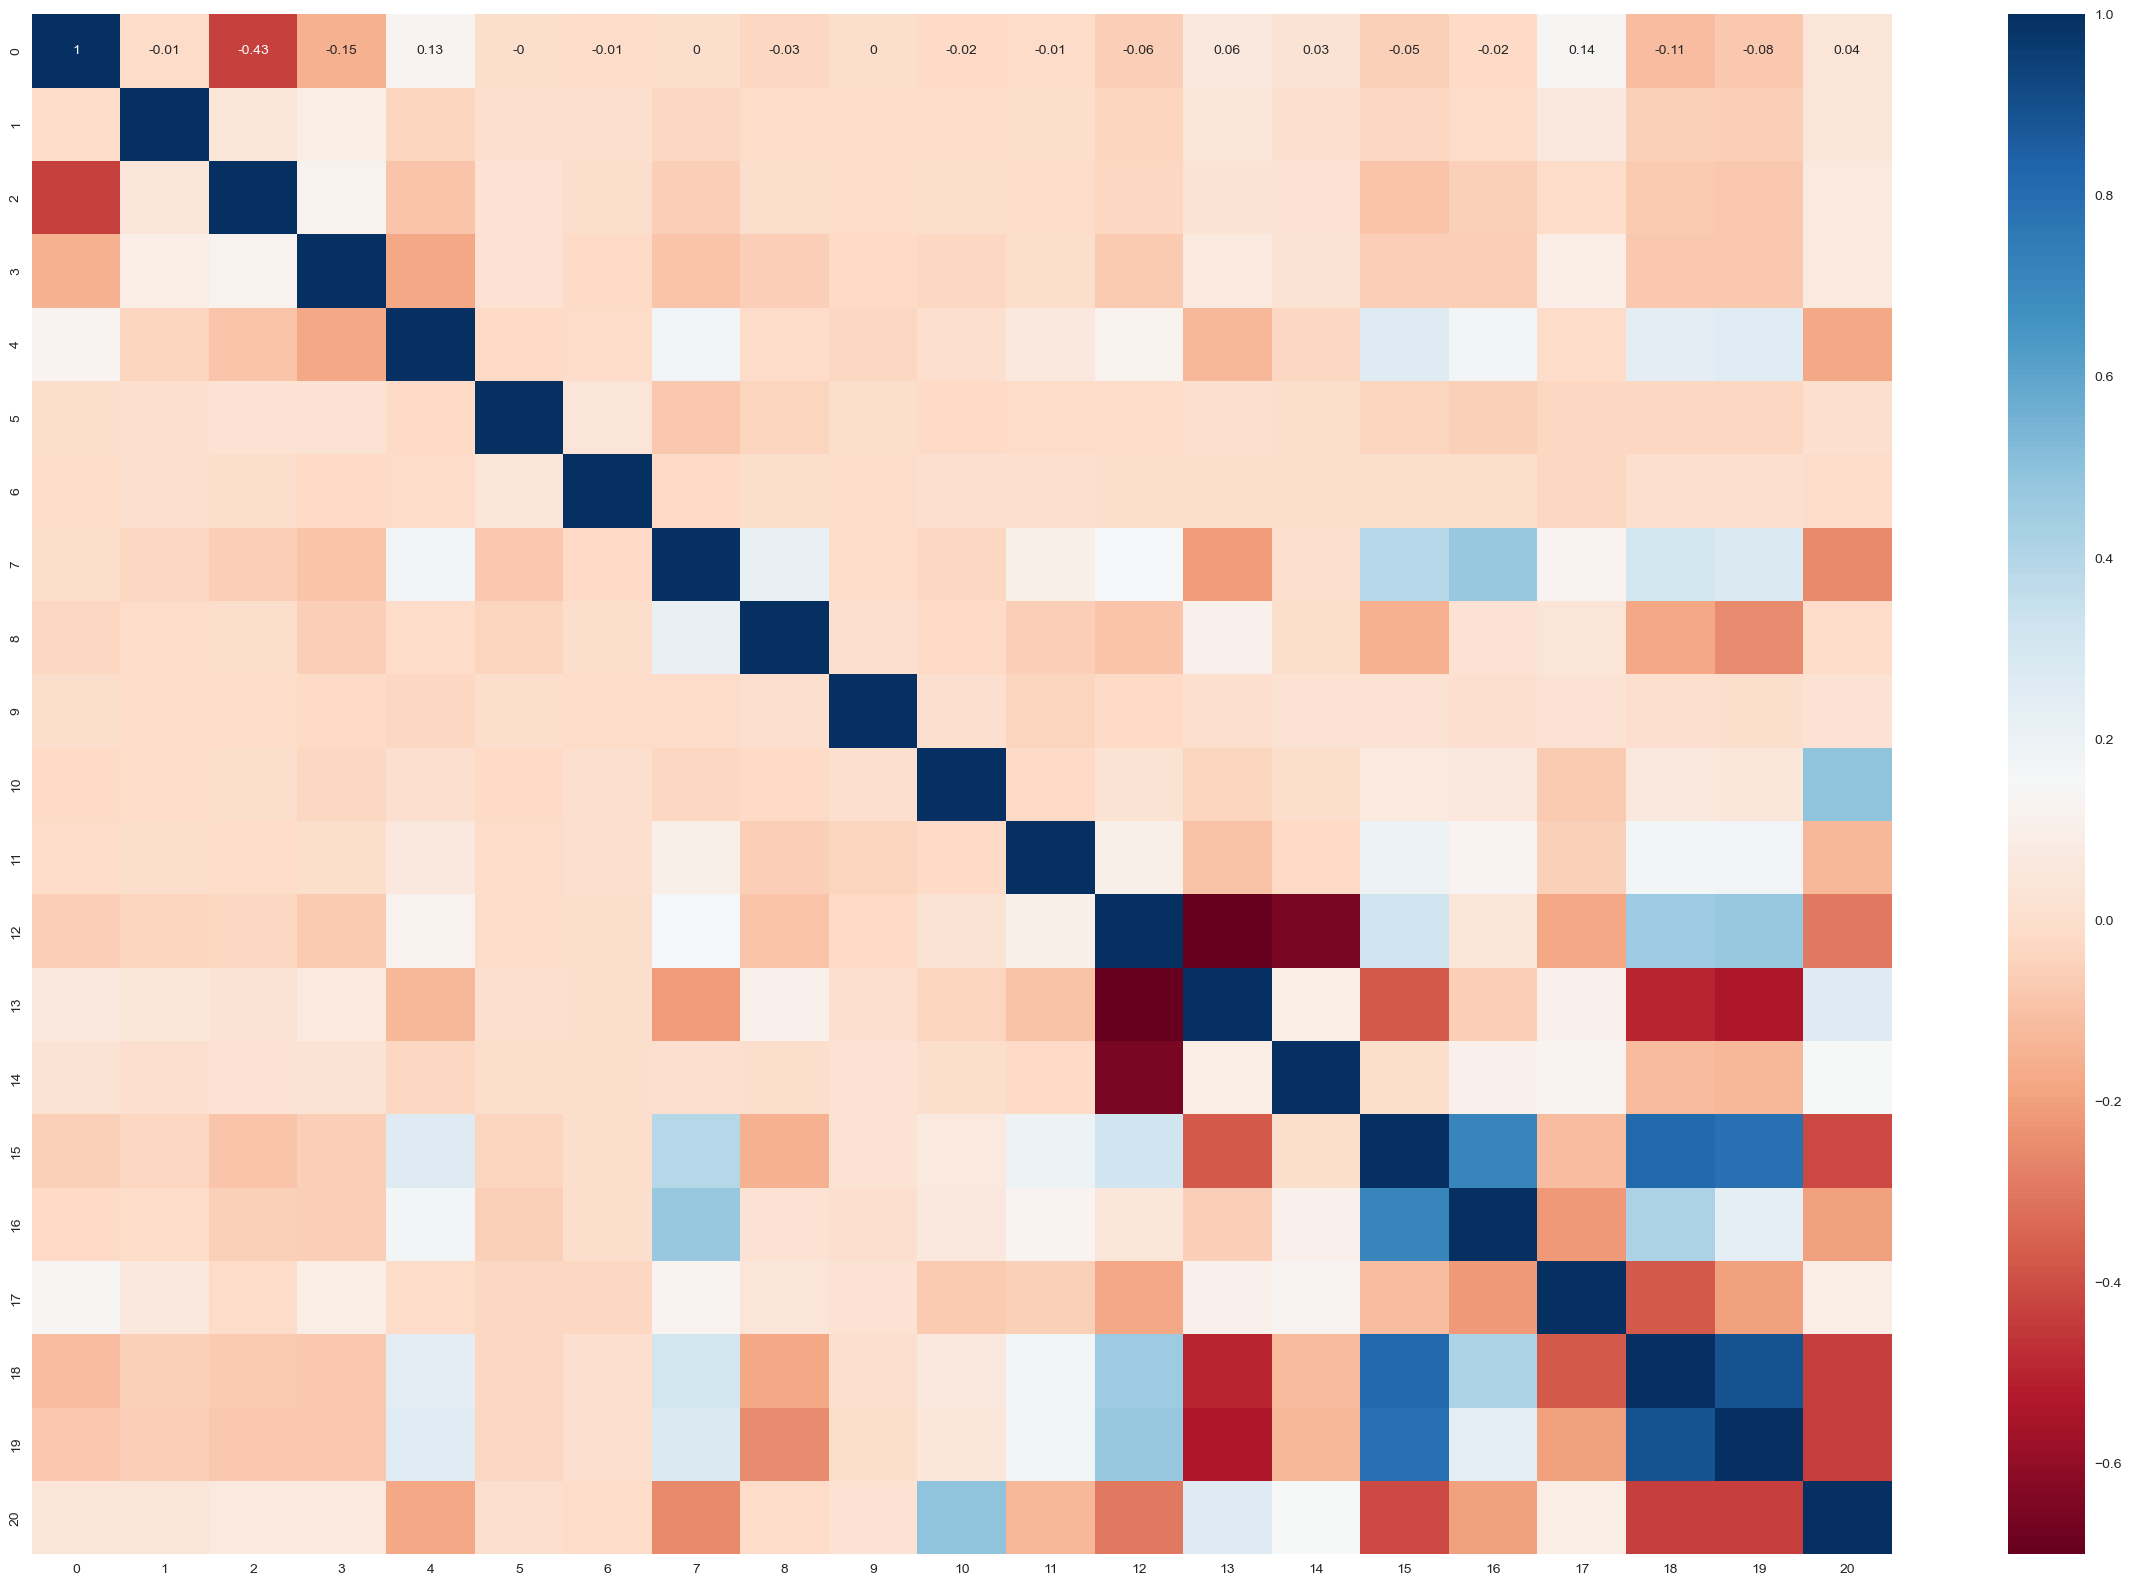

In [83]:
plt.figure(figsize=(30,20))
corr_rounded = np.round(corr,2)
sns.heatmap(corr_rounded,cmap='RdBu',annot=True)

In [84]:
w=data_df.iloc[:,[4,7,8,10,11,12,13,14,15,16,17,18,19,20]]
x=scaler.fit_transform(w)
x

array([[0.        , 0.        , 0.11111111, ..., 0.9829932 , 1.        ,
        0.        ],
       [0.        , 0.        , 0.66666667, ..., 0.67006803, 0.6       ,
        0.        ],
       [0.        , 1.        , 0.66666667, ..., 0.9047619 , 0.8       ,
        0.        ],
       ...,
       [0.        , 0.        , 0.77777778, ..., 0.55102041, 0.        ,
        1.        ],
       [0.        , 0.        , 0.77777778, ..., 0.55102041, 0.        ,
        1.        ],
       [0.        , 0.        , 0.77777778, ..., 0.55102041, 0.        ,
        1.        ]])

In [85]:
y=data_df.iloc[:,-1]
y

20507    0
33693    0
641      0
10478    0
1582     0
        ..
41174    1
41178    1
41181    1
41183    1
41186    1
Name: y, Length: 9280, dtype: int32

## train test split

In [86]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.metrics import accuracy_score, recall_score

In [87]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

## SVM

In [88]:
sv=SVC(kernel='linear')

sv.fit(x_train,y_train)

SVC(kernel='linear')

In [89]:
pred=sv.predict(x_test)
acc=accuracy_score(y_test,pred)
acc

1.0

## Logistic Regression

In [90]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
pred2=lr.predict(x_test)

In [91]:
acc=accuracy_score(y_test,pred2)
acc

1.0

## KNeighborsClassifier

In [92]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
pred3= knn.predict(x_test)

In [93]:
acc=accuracy_score(y_test,pred3)
acc

1.0

## Decision trees classifier

In [94]:
tree=DecisionTreeClassifier()
tree.fit(x_train,y_train)
pred4=tree.predict(x_test)

In [95]:
acc=accuracy_score(y_test,pred4)
acc

1.0

## random forest classifier

In [96]:
forest=RandomForestClassifier()
forest.fit(x_train,y_train)
pred5=forest.predict(x_test)

In [97]:
acc=accuracy_score(y_test,pred5)
acc

1.0

## gaussian NB

In [98]:
model= GaussianNB()
model.fit(x_train,y_train)
pred6 = model.predict(x_test)

In [99]:
acc=accuracy_score(y_test,pred6)
acc

1.0